In [166]:
import yfinance as yf
import numpy as np
from math import sqrt, log
import matplotlib.pyplot as plt
from time import time
#from yahoofinancials import YahooFinancials
#import pandas as pd
data = yf.download("KO")


[*********************100%***********************]  1 of 1 completed


In [167]:
np.log(12)

2.4849066497880004

In [168]:
stockGrowth= np.array((data["Close"]-data["Open"]).to_numpy())
growth_data=stockGrowth/data["Open"]+1

mean=np.mean(growth_data)
stdev=np.std(growth_data)



In [169]:
def uniform_generator(prev: int)->int: #return is in interval [0,100]
    mod=2 ** 32
    a=1103515245
    b=12345
    return(a*prev+b)%mod

In [170]:
def hastings_approx(u:float)->int:
    c0=2.515517
    c1=0.802853
    c2=0.010328
    d1=1.432788
    d2=0.189269
    d3=0.001308
    Hz=np.float64(1-u)
    if Hz > 0.5:
        H=np.float64(1-Hz)
    else:
        H=np.float64(Hz)
    
    t=sqrt(np.log(1/(H*H)))
    k=t-(c0+c1*t+c2*t*t)/(1+d1*t+d2*t*t+ d3*t*t*t)
    if Hz > 0.5:
        k=-k
    return k      

In [171]:
random=uniform_generator(time())
prediction_list=[]
for i in range(1000):
    z=hastings_approx(random/2 ** 32)
    prediction_list.append(z*stdev+mean)
    random=uniform_generator(random)

In [172]:
current=data["Close"][-1]
predicted_price=[]
for i in range(len(prediction_list)):
    predicted_price.append(current)
    current=current*prediction_list[i]

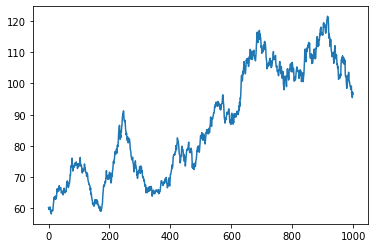

In [173]:
plt.plot(predicted_price)
plt.show()